In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [51]:
output_dir = "docs/"

os.makedirs(output_dir, exist_ok=True)

In [52]:
#
# Carga de datos
#

def load_data():
    filepath = r"C:\Users\sebst\OneDrive\Documentos\GitHub\2024-2-LAB-08-matplotlib-dashboard-cazamorar\files\input\shipping-data.csv"
    df = pd.read_csv(filepath)
    #print(df.head())
    return df

load_data()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


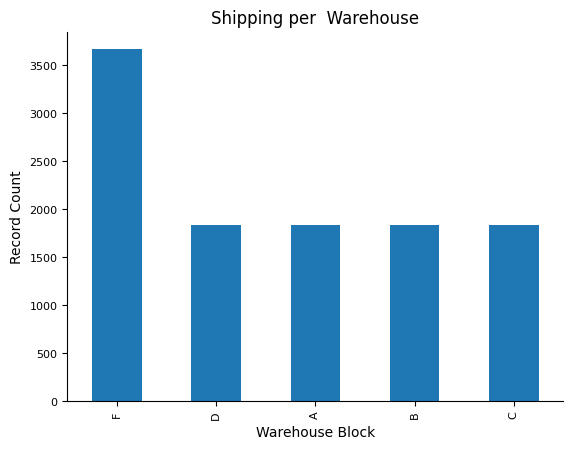

In [53]:
#visual for shipping per warehouse
def create_visual_for_shipping_per_warehouse(df):

    df = df.copy()
    plt.figure()

    comptatges = df.Warehouse_block.value_counts()
    comptatges.plot.bar(
        title="Shipping per  Warehouse",
        xlabel="Warehouse Block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.savefig('docs/shipping_per_warehouse.png')

df = load_data()
create_visual_for_shipping_per_warehouse(df)

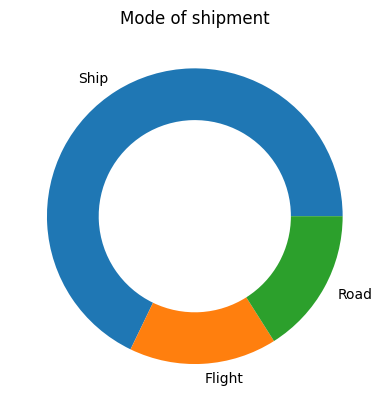

In [54]:
def create_visual_for_mode_of_shipment(df):
    
    df = df.copy()
    plt.figure()

    counts = df.Mode_of_Shipment.value_counts()

    counts.plot.pie(
        title="Mode of shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue", "tab:orange", "tab:green"],
    )
    plt.savefig('docs/mode_of_shipment.png')

df = load_data()
create_visual_for_mode_of_shipment(df)

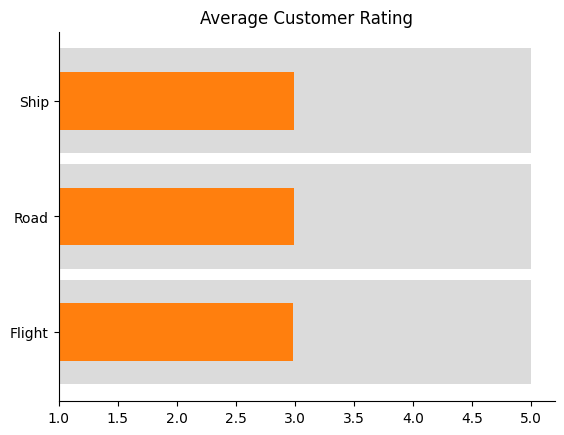

In [55]:
def create_visual_for_average_customer_rating(df):
        df=df.copy()
        plt.figure()
    
        df=(
            df[["Mode_of_Shipment", "Customer_rating"]]
           .groupby("Mode_of_Shipment")
           .describe()
        )
        df.columns=df.columns.droplevel()
        df=df[['mean','min','max']]
        plt.barh(
                y=df.index.values,
                width=df['max'].values-1,
                left=df['min'].values,
                height=0.9,
                color='lightgrey',
                alpha=0.8
            )
        colors=['tab:green' if value >= 3.0 else 'tab:orange' for value in df['mean'].values]
        plt.barh(
                y=df.index.values,
                width=df['mean'].values-1,
                left=df['min'].values,
                height=0.5,
                alpha=1.0,
                color=colors
            )
        plt.title('Average Customer Rating')
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['left'].set_visible("gray")
        plt.gca().spines['bottom'].set_visible("gray")
        plt.savefig('docs/average_customer_rating.png')

df = load_data()
create_visual_for_average_customer_rating(df)

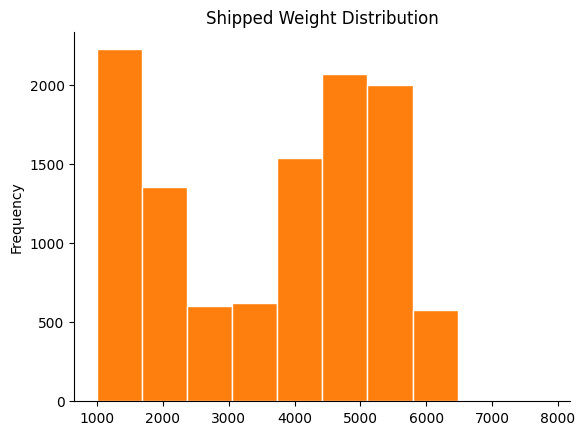

In [56]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()

    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.savefig('docs/weight_distribution.png')

df = load_data()
create_visual_for_weight_distribution(df)

In [57]:
%%writefile index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%; float:left">
            <img src="docs/shipping_per_warehouse.png" alt="Fig 1"/>
            <img src="docs/mode_of_shipment.png" alt="Fig 2"/>
        </div>
        <div style="width:45%; float:left">
            <img src="docs/average_customer_rating.png" alt="Fig 3"/>
            <img src="docs/weight_distribution.png" alt="Fig 4"/>
        </div>
    </body>
</html>

Writing index.html
